# Importing the required libraries

In [8]:
import numpy as np 
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml
print('MXTend Version: %s' % ml.__version__)
print('Pandas Version: %s' % pd.__version__)
print('Numpy Version: %s' % np.__version__)

MXTend Version: 0.21.0
Pandas Version: 1.4.4
Numpy Version: 1.21.5


# Reading of data and removing unwanted columns

In [9]:
df = pd.read_csv('ds2.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


# FP Growth Algorithm

The FP-Growth Algorithm is an alternative way to find frequent item sets without using candidate generations, thus improving performance. For so much, it uses a divide-and-conquer strategy. The core of this method is the usage of a special data structure named frequent-pattern tree (FP-tree), which retains the item set association information.
Steps
First, it compresses the input database creating an FP-tree instance to represent frequent items.
After this first step, it divides the compressed database into a set of conditional databases, each associated with one frequent pattern.
Finally, each such database is mined separately.

# Using FP Growth for generating frequent itemsets

using the use_colnames=True parameter within the apriori algorithm, we switch from items(products) numbers to item(product) names.

In [10]:
frequent_itemsets = fpgrowth(df, min_support=0.6, use_colnames=True)
frequent_itemsets

,support,itemsets
0,1.0,(Kidney Beans)
1,0.8,(Eggs)
2,0.6,(Yogurt)
3,0.6,(Onion)
4,0.6,(Milk)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Kidney Beans, Yogurt)"
7,0.6,"(Eggs, Onion)"
8,0.6,"(Kidney Beans, Onion)"
9,0.6,"(Kidney Beans, Eggs, Onion)"


Creating the Association Rules table according to the confidence metric with min_threshold of 0.8 .

In [11]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf
2,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
3,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
5,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf
7,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf
8,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf


Adding the number of items in the antecedents and consequents parts

In [14]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules["consequents_len"] = rules["consequents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.00,0.00,1.0,1,1
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.0,1.00,0.00,inf,1,1
2,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,1,1
3,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,1,1
4,(Onion),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,1,1
5,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf,2,1
6,"(Eggs, Onion)",(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,2,1
7,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf,1,2
8,(Milk),(Kidney Beans),0.6,1.0,0.6,1.0,1.00,0.00,inf,1,1


# Calculating time complexity of FP Growth Algorithm

In [15]:
%timeit fpgrowth(df, min_support=0.6)

702 µs ± 34.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Confidence versus Support graph for rules

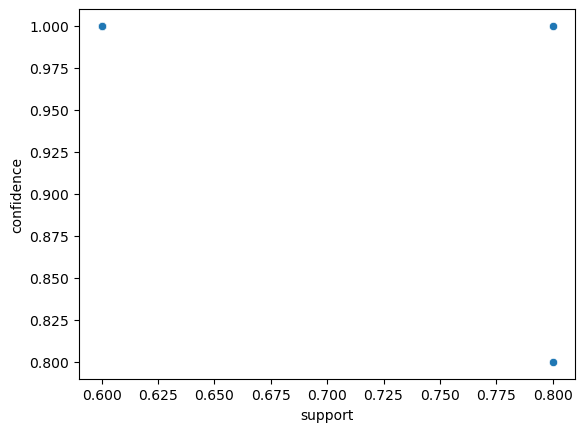

In [16]:
sns.scatterplot(x = "support", y = "confidence", data = rules)
plt.show()

Creating parallel coordinates plot for rules

In [17]:
from pandas.plotting import parallel_coordinates
def rules_to_coordinates(rules):
    rules['antecedent'] = rules['antecedents'].apply(lambda antecedent:list(antecedent)[0])
    rules['consequent'] = rules['consequents'].apply(lambda consequent:list(consequent)[0])
    rules['rule'] = rules.index
    return rules[['antecedent','consequent','rule']]


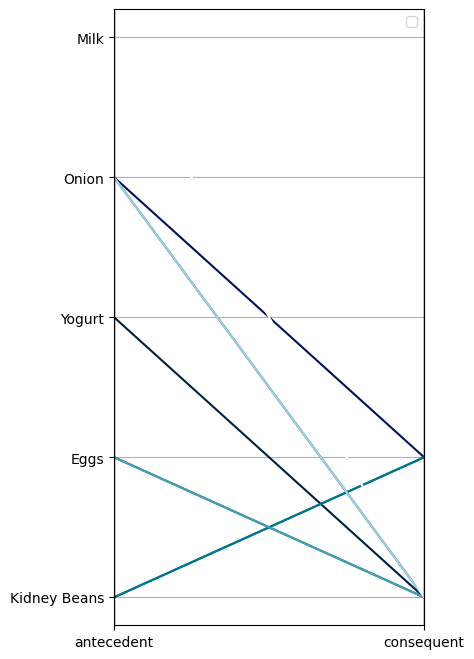

In [18]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()

Creating the Association Rules table according to the support metric with min_threshold of 0.5 .

In [19]:
rules1 = association_rules(frequent_itemsets, metric="support", min_threshold=0.5)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0
3,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
4,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
5,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
8,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf


Adding the number of items in the antecedents and consequents parts

In [20]:
rules1["antecedent_len"] = rules1["antecedents"].apply(lambda x: len(x))
rules1["consequents_len"] = rules1["consequents"].apply(lambda x: len(x))
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len,consequents_len
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0,1,1
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf,1,1
2,(Kidney Beans),(Yogurt),1.0,0.6,0.6,0.60,1.00,0.00,1.0,1,1
3,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,1,1
4,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,1,1
5,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,1,1
6,(Kidney Beans),(Onion),1.0,0.6,0.6,0.60,1.00,0.00,1.0,1,1
7,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf,1,1
8,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6,2,1
9,"(Kidney Beans, Onion)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf,2,1


Confidence versus Support graph for rules1

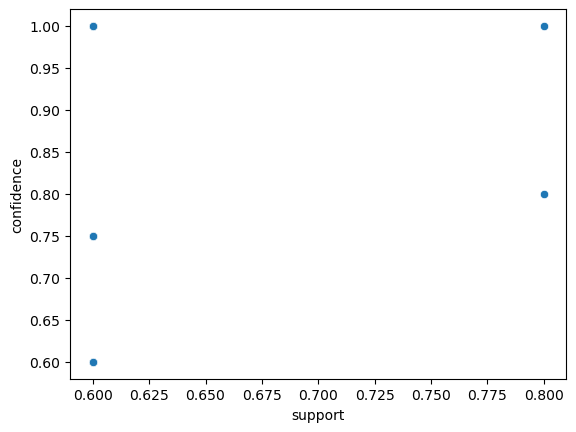

In [21]:
sns.scatterplot(x = "support", y = "confidence", data = rules1)
plt.show()

Creating parallel coordinates plot for rules1

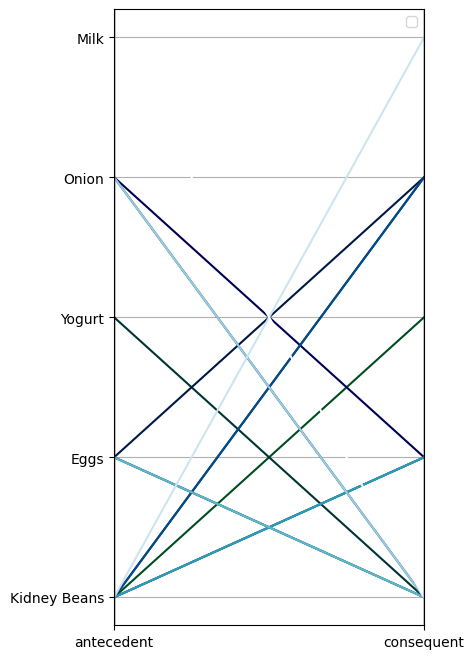

In [22]:
# Convert rules into coordinates suitable for use in a parallel coordinates plot
coords = rules_to_coordinates(rules1)
# Generate parallel coordinates plot
plt.figure(figsize=(4,8))
parallel_coordinates(coords, 'rule',colormap = 'ocean')
plt.legend([])
plt.show()